In [30]:
import cv2
import os

In [31]:
import os

def listar_imagens_em_pasta(pasta):
    # Lista para armazenar os nomes dos arquivos de imagem
    imagens = []
    
    # Percorrer todos os arquivos na pasta
    for arquivo in os.listdir(pasta):
        # Verificar se o arquivo é uma imagem (por extensão)
        if arquivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            # Adicionar o nome do arquivo à lista de imagens
            imagens.append(os.path.join(pasta, arquivo))
    
    return imagens

# Substitua 'caminho_da_pasta' pelo caminho da sua pasta de imagens
caminho_da_pasta = 'imgs/pcs/zale'
imagens_na_pasta = listar_imagens_em_pasta(caminho_da_pasta)

# Exibir a lista de imagens
print("Imagens na pasta:")
for imagem in imagens_na_pasta:
    print(imagem)


Imagens na pasta:
imgs/pcs/zale\zale_novo_diagnonal_tras.png
imgs/pcs/zale\zale_novo_diagonal_frente.png
imgs/pcs/zale\zale_novo_frente.png
imgs/pcs/zale\zale_novo_lado.png
imgs/pcs/zale\zale_novo_tras.png
imgs/pcs/zale\zale_velho_diagonal_frente.png
imgs/pcs/zale\zale_velho_diagonal_tras.png
imgs/pcs/zale\zale_velho_frente.png
imgs/pcs/zale\zale_velho_lado.png
imgs/pcs/zale\zale_velho_tras.png


Imagens na pasta:
imgs/pcs/zale\zale_novo_diagnonal_tras.png
imgs/pcs/zale\zale_novo_diagonal_frente.png
imgs/pcs/zale\zale_novo_frente.png
imgs/pcs/zale\zale_novo_lado.png
imgs/pcs/zale\zale_novo_tras.png
imgs/pcs/zale\zale_velho_diagonal_frente.png
imgs/pcs/zale\zale_velho_diagonal_tras.png
imgs/pcs/zale\zale_velho_frente.png
imgs/pcs/zale\zale_velho_lado.png
imgs/pcs/zale\zale_velho_tras.png


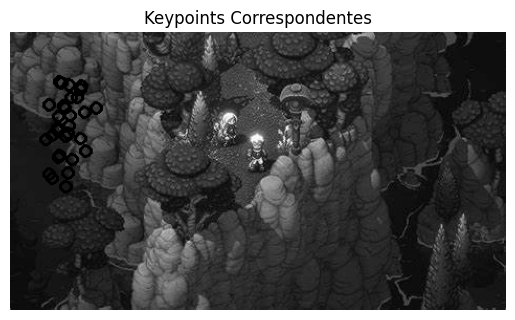

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def listar_imagens_em_pasta(pasta):
    # Lista para armazenar os nomes dos arquivos de imagem
    imagens = []
    
    # Percorrer todos os arquivos na pasta
    for arquivo in os.listdir(pasta):
        # Verificar se o arquivo é uma imagem (por extensão)
        if arquivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            # Adicionar o nome do arquivo à lista de imagens
            imagens.append(os.path.join(pasta, arquivo))
    
    return imagens

# Substitua 'caminho_da_pasta' pelo caminho da sua pasta de imagens
caminho_da_pasta = 'imgs/pcs/zale'
imagens_na_pasta = listar_imagens_em_pasta(caminho_da_pasta)

# Exibir a lista de imagens
print("Imagens na pasta:")
for imagem in imagens_na_pasta:
    print(imagem)
    
# Carregar as imagens de referência
imagens_referencia = []
for img_path in imagens_na_pasta:
    img_ref = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    imagens_referencia.append(img_ref)
    
# Inicializar o detector ORB
orb = cv2.ORB_create()

# Inicializar o matcher de correspondência de features
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Carregar a imagem de entrada
imagem = cv2.imread('Mapas/Penhasco.jpeg', cv2.IMREAD_GRAYSCALE)
if imagem is None:
    print("Erro ao carregar a imagem de entrada.")
else:
    # Detectar keypoints e extrair descritores das imagens de referência
    keypoints_referencia = []
    descritores_referencia = []
    for img_ref in imagens_referencia:
        kp, desc = orb.detectAndCompute(img_ref, None)
        keypoints_referencia.append(kp)
        descritores_referencia.append(desc.astype(np.uint8))  # Convertendo para uint8

    # Detectar keypoints e extrair descritores da imagem de entrada
    keypoints_imagem, descritores_imagem = orb.detectAndCompute(imagem, None)
    if descritores_imagem is not None:
        descritores_imagem = descritores_imagem.astype(np.uint8)  # Convertendo para uint8

        # Inicializar uma lista para guardar os bons matches
        matches_bons = []

        # Encontrar os matches entre a imagem de entrada e cada imagem de referência
        for desc_ref in descritores_referencia:
            matches = bf.match(desc_ref, descritores_imagem)
            matches = sorted(matches, key=lambda x: x.distance)
            matches_bons.append(matches[:10])  # Manter apenas os 10 melhores matches

        # Inicializar uma lista para guardar os keypoints correspondentes
        keypoints_correspondentes = []

        # Filtrar os keypoints correspondentes usando os matches
        for i, matches in enumerate(matches_bons):
            kp_ref = keypoints_referencia[i]
            for match in matches:
                kp_idx = match.trainIdx
                if kp_idx < len(kp_ref):
                    keypoints_correspondentes.append(kp_ref[kp_idx].pt)

        # Desenhar círculos nos keypoints correspondentes na imagem de entrada
        for pt in keypoints_correspondentes:
            pt = tuple(map(int, pt))
            cv2.circle(imagem, pt, 5, (0, 255, 0), 2)

        # Exibir a imagem com os keypoints correspondentes
        plt.imshow(imagem, cmap='gray')
        plt.title('Keypoints Correspondentes')
        plt.axis('off')
        plt.show()
    else:
        print("Erro ao detectar keypoints e extrair descritores da imagem de entrada.")


Imagens na pasta:
imgs/pcs/zale\zale_novo_diagnonal_tras.png
imgs/pcs/zale\zale_novo_diagonal_frente.png
imgs/pcs/zale\zale_novo_frente.png
imgs/pcs/zale\zale_novo_lado.png
imgs/pcs/zale\zale_novo_tras.png
imgs/pcs/zale\zale_velho_diagonal_frente.png
imgs/pcs/zale\zale_velho_diagonal_tras.png
imgs/pcs/zale\zale_velho_frente.png
imgs/pcs/zale\zale_velho_lado.png
imgs/pcs/zale\zale_velho_tras.png
(34.0, 48.96000289916992)
(82.08000183105469, 148.0)


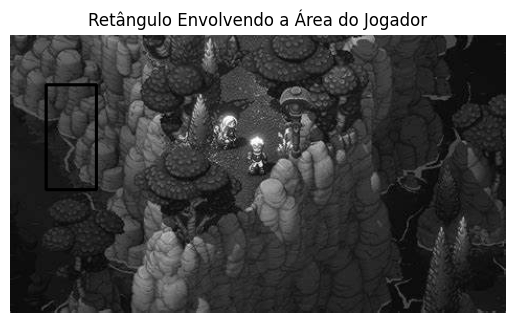

In [48]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def listar_imagens_em_pasta(pasta):
    # Lista para armazenar os nomes dos arquivos de imagem
    imagens = []
    
    # Percorrer todos os arquivos na pasta
    for arquivo in os.listdir(pasta):
        # Verificar se o arquivo é uma imagem (por extensão)
        if arquivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            # Adicionar o nome do arquivo à lista de imagens
            imagens.append(os.path.join(pasta, arquivo))
    
    return imagens

# Substitua 'caminho_da_pasta' pelo caminho da sua pasta de imagens
caminho_da_pasta = 'imgs/pcs/zale'
imagens_na_pasta = listar_imagens_em_pasta(caminho_da_pasta)

# Exibir a lista de imagens
print("Imagens na pasta:")
for imagem in imagens_na_pasta:
    print(imagem)
    
# Carregar as imagens de referência
imagens_referencia = []
for img_path in imagens_na_pasta:
    img_ref = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    imagens_referencia.append(img_ref)
    
# Inicializar o detector ORB
orb = cv2.ORB_create()

# Inicializar o matcher de correspondência de features
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Carregar a imagem de entrada
imagem = cv2.imread('Mapas/Penhasco.jpeg', cv2.IMREAD_GRAYSCALE)
if imagem is None:
    print("Erro ao carregar a imagem de entrada.")
else:
    # Detectar keypoints e extrair descritores das imagens de referência
    keypoints_referencia = []
    descritores_referencia = []
    for img_ref in imagens_referencia:
        kp, desc = orb.detectAndCompute(img_ref, None)
        keypoints_referencia.append(kp)
        descritores_referencia.append(desc.astype(np.uint8))  # Convertendo para uint8

    # Detectar keypoints e extrair descritores da imagem de entrada
    keypoints_imagem, descritores_imagem = orb.detectAndCompute(imagem, None)
    if descritores_imagem is not None:
        descritores_imagem = descritores_imagem.astype(np.uint8)  # Convertendo para uint8

        # Inicializar uma lista para guardar os bons matches
        matches_bons = []

        # Encontrar os matches entre a imagem de entrada e cada imagem de referência
        for desc_ref in descritores_referencia:
            matches = bf.match(desc_ref, descritores_imagem)
            matches = sorted(matches, key=lambda x: x.distance)
            matches_bons.append(matches[:10])  # Manter apenas os 10 melhores matches

        # Inicializar uma lista para guardar os keypoints correspondentes
        keypoints_correspondentes = []

        # Filtrar os keypoints correspondentes usando os matches
        for i, matches in enumerate(matches_bons):
            kp_ref = keypoints_referencia[i]
            for match in matches:
                kp_idx = match.trainIdx
                if kp_idx < len(kp_ref):
                    keypoints_correspondentes.append(kp_ref[kp_idx].pt)

        # Encontrar os limites do retângulo envolvendo os keypoints correspondentes
        if keypoints_correspondentes:
            x_values, y_values = zip(*keypoints_correspondentes)
            x_min, y_min = min(x_values), min(y_values)
            width = max(x_values) - x_min
            height = max(y_values) - y_min

            # Desenhar o retângulo na imagem de entrada
            print((x_min, y_min))
            print((x_min + width, y_min + height))
            imagem_com_retangulo = cv2.rectangle(imagem.copy(), (int(x_min), int(y_min)), (int(x_min + width), int(y_min + height)), (0, 255, 0), 2)

            # Exibir a imagem com o retângulo
            plt.imshow(imagem_com_retangulo, cmap='gray')
            plt.title('Retângulo Envolvendo a Área do Jogador')
            plt.axis('off')
            plt.show()
        else:
            print("Não foi possível encontrar keypoints correspondentes.")
    else:
        print("Erro ao detectar keypoints e extrair descritores da imagem de entrada.")
